# Simple Classifiers, FastText Pretrained

## Import Modules

In [1]:
import pandas as pd
import numpy as np

from nltk.tokenize import word_tokenize 
import gensim 
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

import keras

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn import svm

from sklearn.decomposition import PCA
from matplotlib import pyplot

Using TensorFlow backend.


## Import Data

In [2]:
path = '../data/'
file = path + 'climate_change_tweets_sample-2020-05-16-17-57.csv'

file_o = open(file,encoding='utf8')

data = pd.read_csv(file)

file_o.close

<function TextIOWrapper.close()>

A little bit of cleaning...

In [3]:
data= data.query("username != '54'")
data= data.query("username != '318'")
data= data.query("username != '96'")

A little bit of shuffling...

In [4]:
data = data.sample(frac=1)

## Get Tweets and Labels

In [5]:
tweets = data['text'].values

labels = data['label'].values

Train and Test set :

In [6]:
test_size = 0.4
tweets_train, tweets_test, labels_train, labels_test = train_test_split(tweets,labels,test_size=test_size)

## Transform tweets with pretrained model

### Define the tokenizer and define the model pretrained

In [7]:
model = 'wiki-news-300d-1M.vec'

model_ft = KeyedVectors.load_word2vec_format(model, binary=False)

In [8]:
sentence = model_ft['hello','animal']
print(sentence.shape)

(2, 300)


In [9]:
def remove_not_in_voc(list):
    aux=[]
    for e in list:
        if e in model_ft.vocab:
            aux.append(e)
    return aux

In [10]:
#word_dim = 10

tokens = []
label_tok = []
test_size=0.4

for i in range(len(tweets)):
    t = tweets[i]
    t = t.replace("@"," ")
    t = t.replace("?"," ")
    t = t.replace("!"," ")
    t = t.replace(":"," ")
    t = t.replace("/"," ")
    t = t.replace("."," ")
    t = t.replace(";"," ")
    t = t.replace("'"," ")
    t = t.replace('"'," ")
    t = t.replace("#"," ")
    t = t.replace("http"," ")
    t = t.replace("-"," ")
    t = t.replace("0"," ")
    t = t.replace("1"," ")
    t = t.replace("2"," ")
    t = t.replace("3"," ")
    t = t.replace("4"," ")
    t = t.replace("5"," ")
    t = t.replace("6"," ")
    t = t.replace("7"," ")
    t = t.replace("8"," ")
    t = t.replace("9"," ")
    t = t.replace("www"," ")
    t = t.replace("…"," ")
    t = t.replace("="," ")
    t = t.replace("_"," ")
    t = t.replace("—"," ")
    t = t.replace("twitter"," ")
    t = t.replace("$"," ")
    t = t.replace("€"," ")
    t = word_tokenize(t)
    t = remove_not_in_voc(t)
    if len(t)!=0:
        tokens.append(t)
        label_tok.append(labels[i])

tok_train, tok_test, labels_train, labels_test = train_test_split(tokens,label_tok,test_size=test_size)

### Graphic representation of words

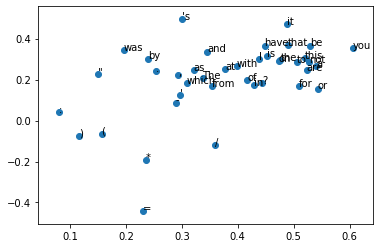

In [20]:
X = model_ft[model_ft.vocab]
pca = PCA(n_components=2)
pca_results = pca.fit_transform(X)

pyplot.scatter(pca_results[:40, 0], pca_results[:40, 1])

words = list(model_ft.vocab)

for i, word in enumerate(words[:40]):
    pyplot.annotate(word[:], xy=(pca_results[i, 0], pca_results[i, 1]))
pyplot.show()

### Embed the tweets

In [12]:
train_embed = []
for i in range(len(tok_train)):
    train_embed.append(model_ft[tok_train[i]])

test_embed = []
for i in range(len(tok_test)):
    test_embed.append(model_ft[tok_test[i]])

max_words_in_tweets = 20

train_embed = keras.preprocessing.sequence.pad_sequences(train_embed, maxlen = max_words_in_tweets,padding='post')
test_embed = keras.preprocessing.sequence.pad_sequences(test_embed, maxlen = max_words_in_tweets,padding='post')

In [13]:
train_embed = train_embed.reshape(-1,300*max_words_in_tweets)
print(train_embed.shape)
test_embed = test_embed.reshape(-1,300*max_words_in_tweets)
print(test_embed.shape)

(10803, 6000)
(7203, 6000)


## Classifiers

### Naive Bayes Multinomial

In our case, binomial.

classifier = MultinomialNB().fit(train_embed, labels_train)

predicted = classifier.predict(test_embed)

acc=0
for i in range(len(predicted)):
    if predicted[i]==labels_test[i]:
        acc = acc + 1

acc=acc/len(predicted)

print('Accuracy on test :', round(acc,4))

### Decision Tree Classifier

In [14]:
classifier = tree.DecisionTreeClassifier().fit(train_embed, labels_train)

In [15]:
predicted = classifier.predict(test_embed)

acc=0
for i in range(len(predicted)):
    if predicted[i]==labels_test[i]:
        acc = acc + 1

acc=acc/len(predicted)

print('Accuracy on test :', round(acc,4))

Accuracy on test : 0.6027


### Support Vector Machines

In [16]:
classifier = svm.SVC(verbose=True,cache_size=600).fit(train_embed, labels_train)

[LibSVM]

In [17]:
predicted = classifier.predict(test_embed)

acc=0
for i in range(len(predicted)):
    if predicted[i]==labels_test[i]:
        acc = acc + 1

acc=acc/len(predicted)

print('Accuracy on test :', round(acc,4))

Accuracy on test : 0.5998


### Multilayer Perceptron (Simplest Neural Network)

In [18]:
classifier = MLPClassifier().fit(train_embed, labels_train)

In [19]:
predicted = classifier.predict(test_embed)

acc=0
for i in range(len(predicted)):
    if predicted[i]==labels_test[i]:
        acc = acc + 1

acc=acc/len(predicted)

print('Accuracy on test :', round(acc,4))

Accuracy on test : 0.6013
